In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import sys 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import cross_validation
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression,SGDClassifier
import re
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import Normalizer,LabelEncoder,normalize,PolynomialFeatures
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
import matplotlib

In [11]:
def preprocess(text):
    t = re.sub('-',r' ',text)
    t = re.sub('\W',r' ',t)
    t = re.sub('\d',r' ',t)
    return t

def crossValidateClassifier(X,y,clf):
    cross_val = cross_validation.StratifiedKFold(y_train,n_folds=5,shuffle=True)
    cv_score = cross_validation.cross_val_score(clf,X,y,scoring='accuracy',cv=cross_val)
    print cv_score
    print np.mean(cv_score)
    return

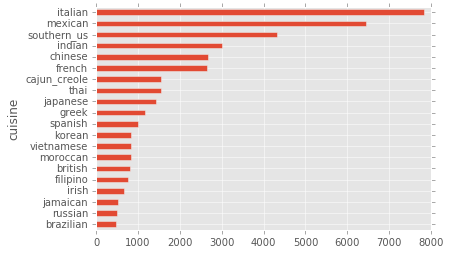

In [23]:
stemmer = WordNetLemmatizer()
train = pd.read_json("train.json")
train['ing'] = [' '.join([stemmer.lemmatize(preprocess(ingr)) for ingr in recette]).strip() for recette in train['ingredients']]

matplotlib.style.use('ggplot')
cuisine_group = train.groupby('cuisine')
cuisine_group.size().sort_values(ascending=True).plot.barh()
plt.show()

tfidf = TfidfVectorizer(sublinear_tf=True,max_df=0.5,ngram_range=(1,2),stop_words='english',norm='l2',binary=False)
tfidf.fit(train['ing'])
X_train = tfidf.transform(train['ing'])
y_train = train['cuisine']

In [24]:
# encode string labels
lenc = LabelEncoder()
lenc.fit(y_train)
y_train_enc = lenc.transform(y_train)
#power normalization
X_train.data**=0.5
normalize(X_train,copy=False)

<39774x80801 sparse matrix of type '<type 'numpy.float64'>'
	with 1471435 stored elements in Compressed Sparse Row format>

In [25]:
test = pd.read_json("test.json")
test['ing'] = [' '.join([stemmer.lemmatize(preprocess(ingr)) for ingr in recette]).strip() for recette in test['ingredients']]
X_test = tfidf.transform(test['ing'])

In [26]:
X_test.data**=0.5
normalize(X_test,copy=False)
categories = train['cuisine'].unique()
clf = LinearSVC(C=0.5,multi_class='ovr',dual=True)
crossValidateClassifier(X_train,y_train,clf)
#test['cuisine']=train_and_test(clf,X_train,y_train,X_test)
#test[['id','cuisine']].to_csv("lr_c5_norm.csv",index=False)

20
[ 0.79326802  0.7916562   0.78682755  0.79109546  0.79476532]
0.791522509921
